<a href="https://colab.research.google.com/github/elleneee/Fraud-Risk-Model-and-Privacy-Analysis/blob/jing/CS5100_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('bs140513_032310.csv')
print(df.shape)
df.head()

(594643, 10)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [ ]:
# remove quotation mark
column_change = [c for c in df.columns if c not in ['step', 'amount', 'fraud']]
df[column_change] = df[column_change].replace("'", "", regex=True)
df.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,M,28007,M348934600,28007,es_transportation,4.55,0
1,0,C352968107,2,M,28007,M348934600,28007,es_transportation,39.68,0
2,0,C2054744914,4,F,28007,M1823072687,28007,es_transportation,26.89,0
3,0,C1760612790,3,M,28007,M348934600,28007,es_transportation,17.25,0
4,0,C757503768,5,M,28007,M348934600,28007,es_transportation,35.72,0


In [ ]:
# drop unnecessary column
df = df.drop(['zipcodeOri','zipMerchant'], axis = 1)
df.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


# Preprocessing data

In [ ]:
new_df = df.copy()
#Frequency Encoding customer and merchant features
for col in ['customer', 'merchant']:
    print(f"Frequency Encoding: {col} - {df[col].nunique()}")
    freq = df[col].value_counts()
    df[col] = df[col].apply(lambda x: freq[x])

Frequency Encoding: customer - 4112
Frequency Encoding: merchant - 50


In [ ]:
#Label Encoding age, gender, category
for col in ['gender', 'age', 'category']:
    print(f"Label Encoding: {col} - {df[col].nunique()}")
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Label Encoding: gender - 4
Label Encoding: age - 8
Label Encoding: category - 15


In [ ]:
X = df.drop(['fraud'], axis = 1)
y = df['fraud']
print(X.head())
print("\n\n", y.head())

   step  customer  age  gender  merchant  category  amount
0     0       167    4       2    205426        12    4.55
1     0       169    2       2    205426        12   39.68
2     0        65    4       1    299693        12   26.89
3     0       171    3       2    205426        12   17.25
4     0       145    5       2    205426        12   35.72


 0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64


In [ ]:
# dimension reduction using PCA
scaler_pca = StandardScaler()
scaled_pca_df = scaler_pca.fit_transform(df)

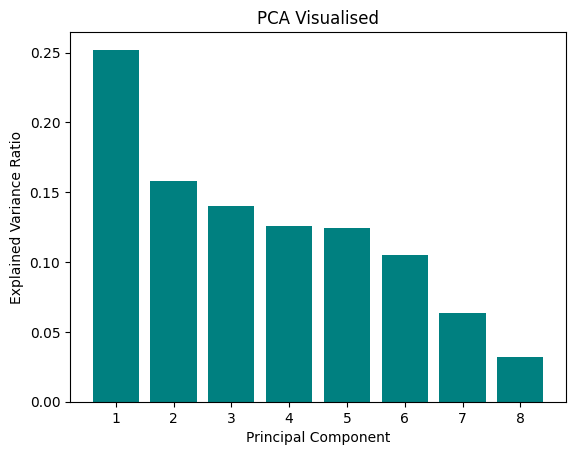

In [ ]:
pca = PCA(n_components = 8) # Creating a PCA model using total variables (explanatory or not).
pca.fit(scaled_pca_df) # Fit the data...

# Let's plot the explained_variance_ratio_ in a similar manner to the lecture slides...
plt.bar(range(1,9), pca.explained_variance_ratio_, color='teal') # Plot on the line graphs...
plt.title("PCA Visualised") # Show the title
plt.xlabel('Principal Component') # Show the x axis label
plt.ylabel('Explained Variance Ratio') # Show the y axis label
plt.xticks([1, 2, 3, 4, 5,6,7,8]) # Set the x axis range and values
plt.show() # Show the graph.

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# dealing with imbalanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # ROC Curve and AUC
    try:
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='darkgray', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name}')
        plt.legend(loc='lower right')
        plt.show()
    except AttributeError:
        print(f"{model_name} does not support predict_proba, ROC curve cannot be plotted.")

    # Precision-Recall Curve and AUC
    try:
        precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
        pr_auc = auc(recall, precision)

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, color='green', label=f'PR Curve (area = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Precision-Recall Curve for {model_name}')
        plt.legend(loc='best')
        plt.show()
    except AttributeError:
        print(f"{model_name} does not support predict_proba, PR curve cannot be plotted.")

Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193918
           1       0.91      0.79      0.85      2315

    accuracy                           1.00    196233
   macro avg       0.96      0.90      0.92    196233
weighted avg       1.00      1.00      1.00    196233



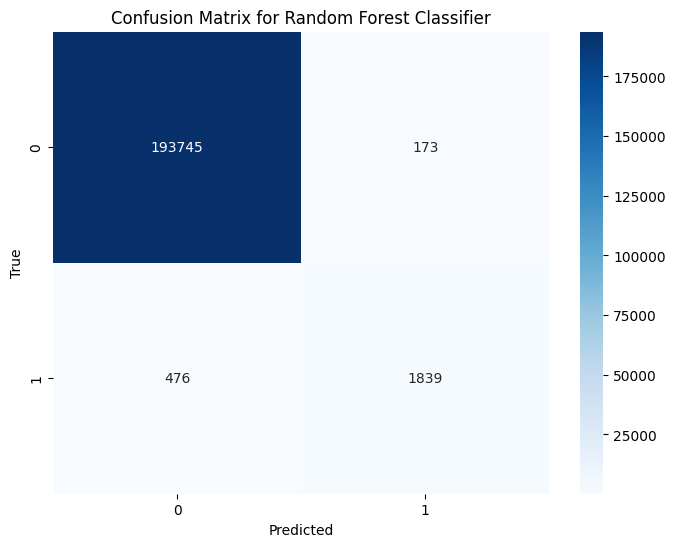

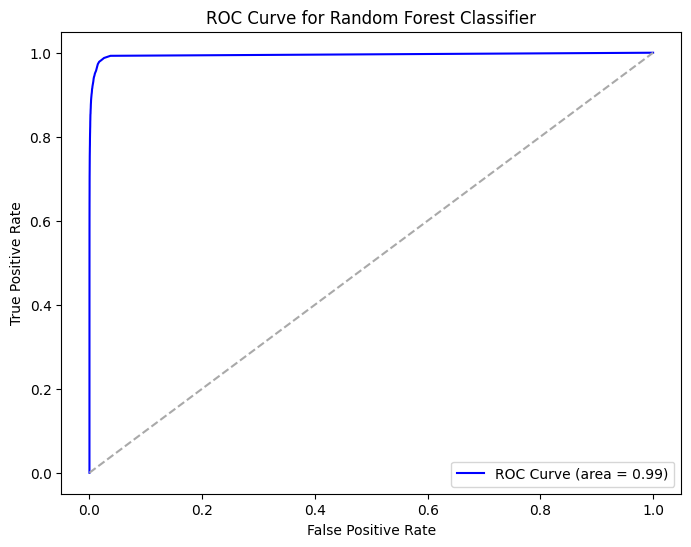

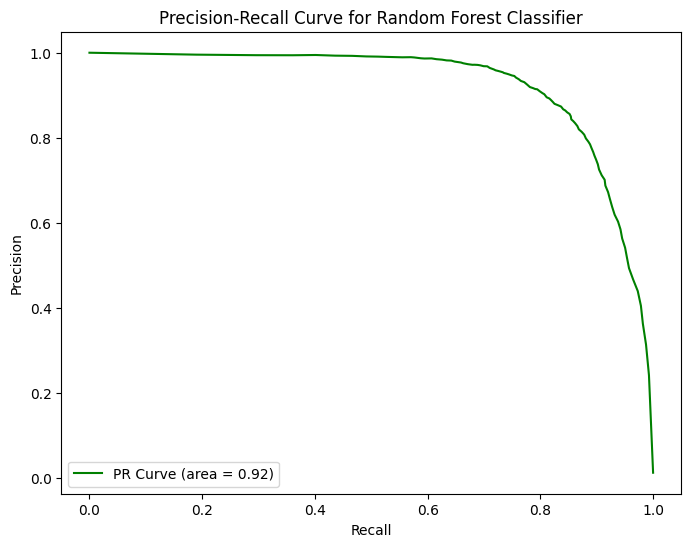

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
random_forest_model = RandomForestClassifier()

# Evaluate the model
evaluate_model(random_forest_model, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Classification Report for KNN Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193918
           1       0.88      0.76      0.82      2315

    accuracy                           1.00    196233
   macro avg       0.94      0.88      0.91    196233
weighted avg       1.00      1.00      1.00    196233



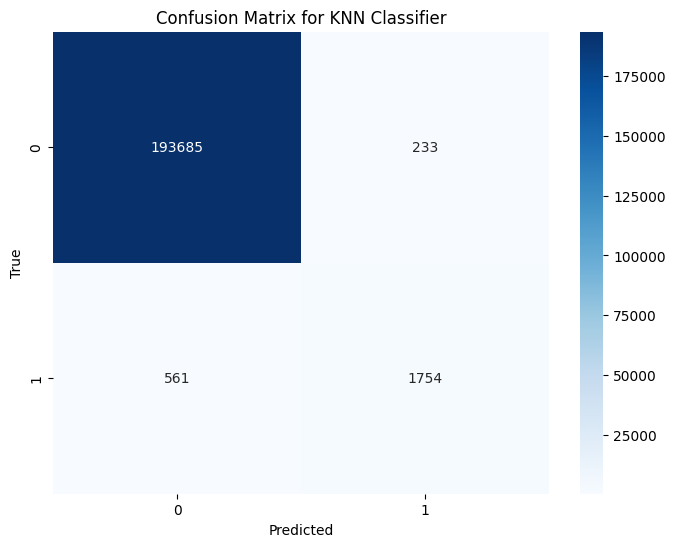

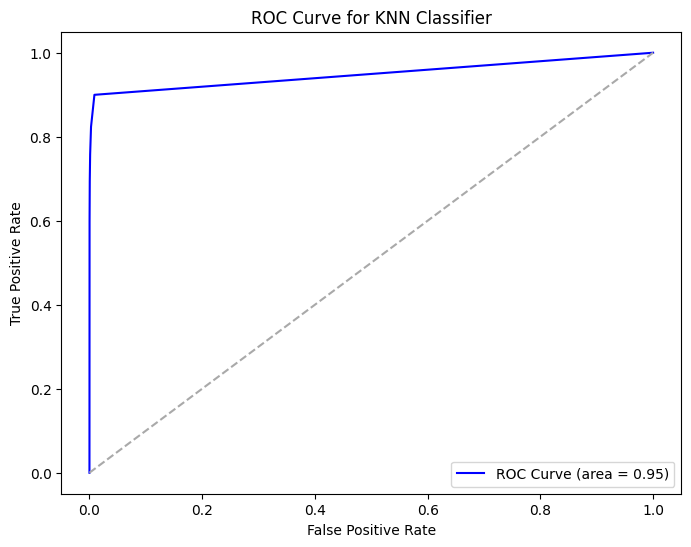

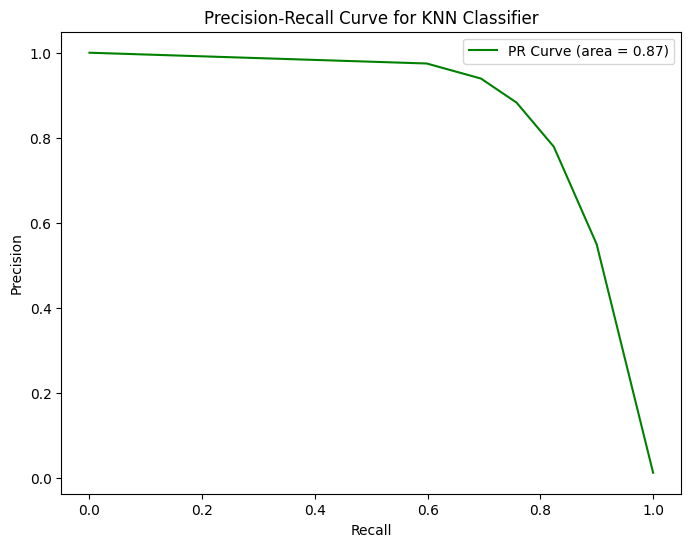

In [ ]:
# importing the KNN library
from sklearn.neighbors import KNeighborsClassifier

# Build and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn, "KNN Classifier", X_train, y_train, X_test, y_test)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    193918
           1       0.16      0.99      0.27      2315

    accuracy                           0.94    196233
   macro avg       0.58      0.96      0.62    196233
weighted avg       0.99      0.94      0.96    196233



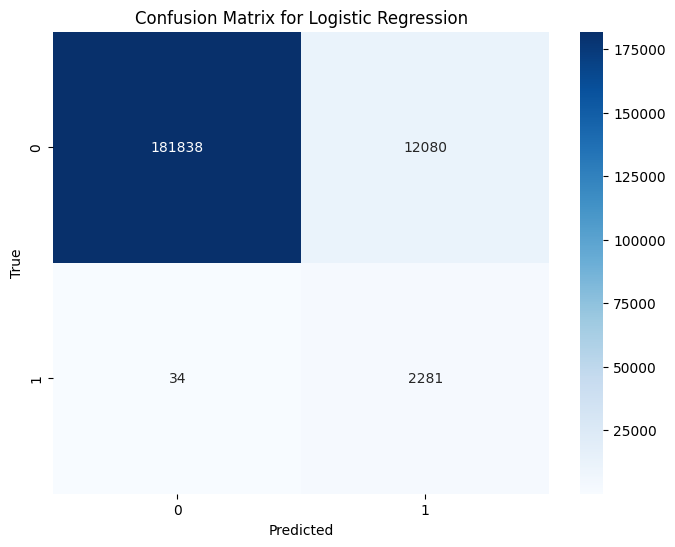

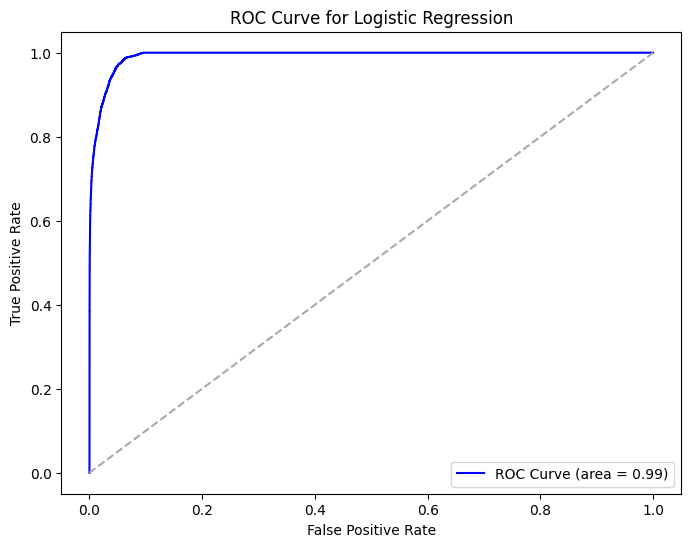

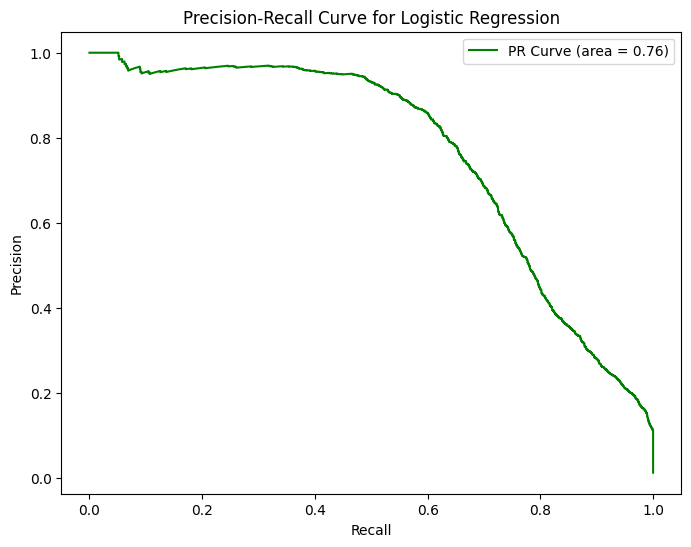

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Evaluate the model
evaluate_model(logistic_regression_model, "Logistic Regression",  X_train, y_train, X_test, y_test)

Classification Report for XGBoost Classifier:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    193918
           1       0.91      0.81      0.86      2315

    accuracy                           1.00    196233
   macro avg       0.95      0.91      0.93    196233
weighted avg       1.00      1.00      1.00    196233



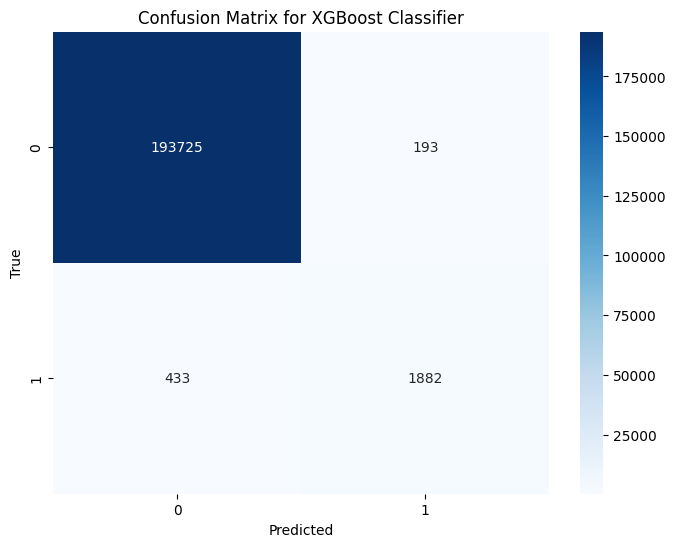

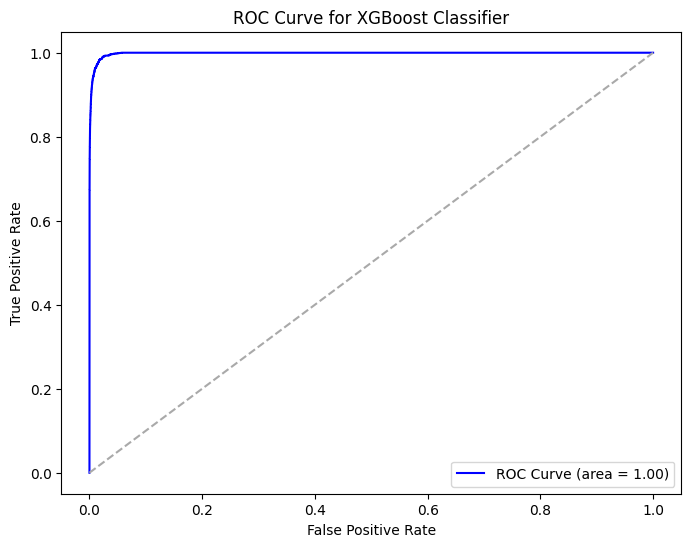

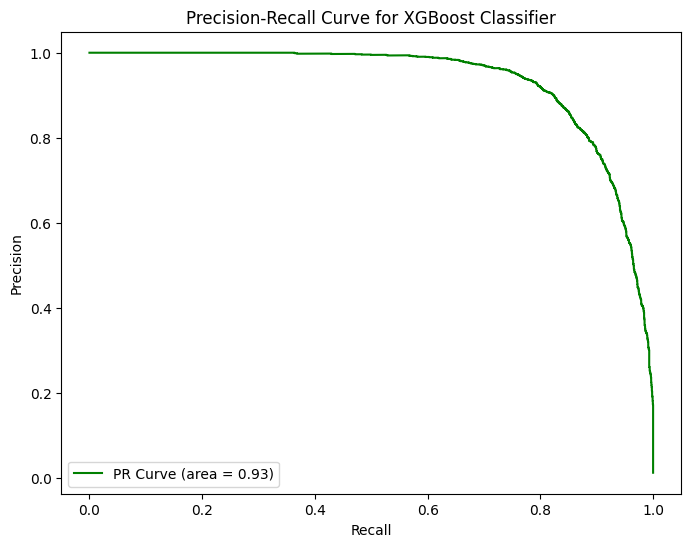

In [ ]:
from xgboost import XGBClassifier

# Instantiate the XGBClassifier model
xgb_classifier_model = XGBClassifier()

# Evaluate the model
evaluate_model(xgb_classifier_model, "XGBoost Classifier", X_train, y_train, X_test, y_test)